In [1]:
import numpy as np
import tensorflow as tf
import random
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageChops, ImageOps
from sklearn.model_selection import train_test_split

In [2]:
img_size_x = 30
img_size_y = 30

In [3]:
def get_img(path):
    test_img = Image.open(path)
    test_img = test_img.convert('L')
    test_img = test_img.resize((img_size_x, img_size_y)) 
    test_x = np.array(test_img, np.float32)
    test_x = test_x / 255.0
    return test_x

In [4]:
path = 'D:/Лабы 3 курс/МНСиРО/cell_images'
folder_list = ['Parasitized', 'Uninfected']

In [5]:
# считывание данных
x_full = []
y_full = []
for folder in folder_list:
    i = 0
    file_list = os.listdir(path + '/' + folder)
    for file in file_list:
        x_full.append(get_img(path + '/' + folder + '/' + file))
        i += 1
        if folder == 'Parasitized':
            y_full.append(0)
        else:
            y_full.append(1)
        if i == 250:
            break
print(x_full[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.39215687
  0.58431375 0.07058824 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.04313726 0.14901961 0.         0.         0.
  0.02745098 0.42745098 0.56078434 0.5372549  0.5372549  0.69411767
  0.7294118  0.60784316 0.34509805 0.09803922 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.05098039 0.5137255  0.7411765  0.4627451  0.41568628 0.40784314
  0.49411765 0.7254902  0.7254902  0.72156864 0.7137255  0.7019608
  0.69803923 0.7176471  0.7254902  0.63529414 0.40784314 0.42745098
  0.16078432 0.02352941 0.         0.         0.         0.        ]
 [0.         0.         0.        

In [6]:
print(len(x_full))

500


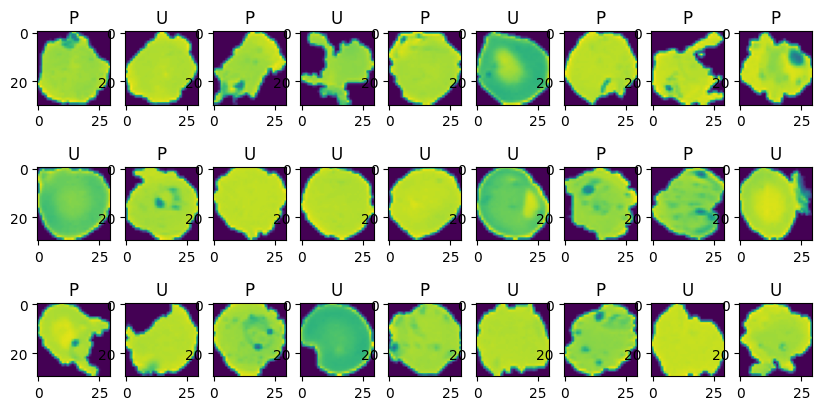

In [7]:
plt.figure(figsize=(10,5))
for i in range(27):
    plt.subplot(3,9,i + 1)
    item = random.randint(0, len(x_full) - 1)
    plt.imshow(x_full[item])
    plt.title(['P','U'][y_full[item]])

In [8]:
# x_f = []

# for i in range(len(x_full)):
#     x = []
#     for j in range(len(x_full[0])):
#         for k in range(len(x_full[0][0])):
#             x.extend(1 - x_full[i][j][k][:3])
#     x_f.append(x)

x_full_np = np.array(x_full, np.float32)
# x_full_np = np.array(x_f, np.float32)

In [9]:
n_classes = 2
num_featres = img_size_x * img_size_y

n_hidden_1 = 1500
n_hidden_2 = 100
n_hidden_3 = 50

In [10]:
y_full = np.array(y_full, np.int32)
y_full_cat = keras.utils.to_categorical(y_full, n_classes)

In [11]:
print(y_full[1])
print(y_full_cat[1])
(x_train, x_test, y_train, y_test) = train_test_split(x_full_np, 
                                                      y_full_cat, test_size=0.2, random_state=42)

0
[1. 0.]


In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 30, 30)
(100, 30, 30)
(400, 2)
(100, 2)


In [13]:
model = Sequential()
model.add(Flatten(input_shape = (img_size_x, img_size_y, 1)))
model.add(Dense(n_hidden_1, activation = 'ReLU'))
model.add(Dense(n_hidden_2, activation = 'ReLU'))
model.add(Dense(n_hidden_3, activation = 'ReLU'))
model.add(Dense(n_classes, activation = 'ReLU'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 1500)              1351500   
                                                                 
 dense_1 (Dense)             (None, 100)               150100    
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 1,506,752
Trainable params: 1,506,752
Non-trainable params: 0
_________________________________________________________________


In [14]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0001)
model.compile(loss='MSE', optimizer=optimizer, metrics = ['accuracy'])

In [15]:
history = model.fit(x_train, y_train, batch_size=32, epochs=120, validation_split=0.2, verbose = 1)

Epoch 1/120
10/10 [==============================] - 1s 47ms/step - loss: 0.2698 - accuracy: 0.5281 - val_loss: 0.2511 - val_accuracy: 0.6000
Epoch 2/120
10/10 [==============================] - 0s 25ms/step - loss: 0.2447 - accuracy: 0.6250 - val_loss: 0.2572 - val_accuracy: 0.4875
Epoch 3/120
10/10 [==============================] - 0s 25ms/step - loss: 0.2386 - accuracy: 0.6281 - val_loss: 0.2562 - val_accuracy: 0.4750
Epoch 4/120
10/10 [==============================] - 0s 30ms/step - loss: 0.2305 - accuracy: 0.6594 - val_loss: 0.2622 - val_accuracy: 0.5250
Epoch 5/120
10/10 [==============================] - 0s 25ms/step - loss: 0.2246 - accuracy: 0.6938 - val_loss: 0.2543 - val_accuracy: 0.4750
Epoch 6/120
10/10 [==============================] - 0s 25ms/step - loss: 0.2180 - accuracy: 0.7344 - val_loss: 0.2547 - val_accuracy: 0.5125
Epoch 7/120
10/10 [==============================] - 0s 26ms/step - loss: 0.2127 - accuracy: 0.7719 - val_loss: 0.2546 - val_accuracy: 0.5000
Epoch 

10/10 [==============================] - 0s 25ms/step - loss: 0.0117 - accuracy: 0.9937 - val_loss: 0.2548 - val_accuracy: 0.6000
Epoch 116/120
10/10 [==============================] - 0s 27ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.2433 - val_accuracy: 0.6375
Epoch 117/120
10/10 [==============================] - 0s 24ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.2498 - val_accuracy: 0.5875
Epoch 118/120
10/10 [==============================] - 0s 24ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.2449 - val_accuracy: 0.6250
Epoch 119/120
10/10 [==============================] - 0s 25ms/step - loss: 0.0109 - accuracy: 0.9969 - val_loss: 0.2458 - val_accuracy: 0.6125
Epoch 120/120
10/10 [==============================] - 0s 25ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.2513 - val_accuracy: 0.6125


In [16]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2836 - accuracy: 0.5600


[0.28355786204338074, 0.5600000023841858]

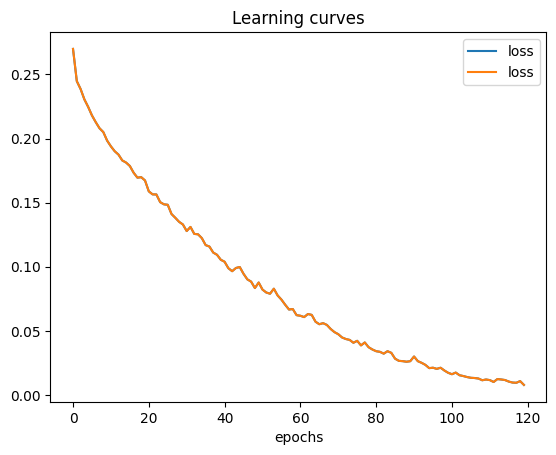

In [17]:
plt.title('Learning curves')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

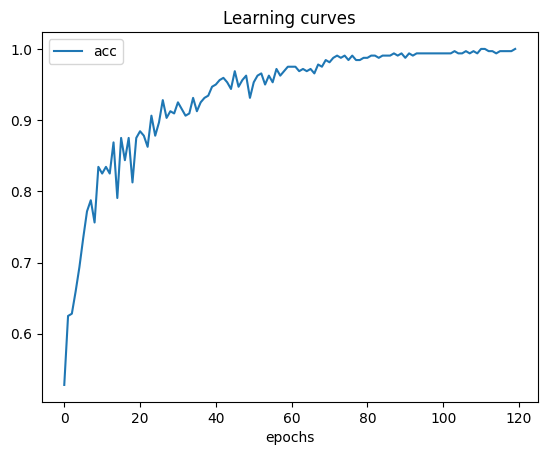

In [18]:
plt.title('Learning curves')
plt.plot(history.history['accuracy'], label = 'acc')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [19]:
test_imgs = x_test[:30]
preds = model.predict(test_imgs)
print(preds)

1/1 [==============================] - 0s 114ms/step
[[0.7189318  0.30486265]
 [0.2431215  0.73504776]
 [0.11782276 0.8326183 ]
 [0.9634248  0.        ]
 [0.7825316  0.02140865]
 [0.50586873 0.41958115]
 [0.970758   0.        ]
 [0.5989262  0.35338873]
 [0.08191223 0.39475647]
 [0.         0.84299463]
 [0.33297375 0.5132501 ]
 [0.61075306 0.35513765]
 [0.         1.1122344 ]
 [0.50653696 0.48130313]
 [0.4924657  0.3851876 ]
 [0.60223585 0.37005875]
 [0.3429626  0.67824817]
 [0.19919424 0.6473504 ]
 [0.30721724 0.6423912 ]
 [0.20360984 0.7448348 ]
 [0.10944717 0.9168232 ]
 [0.69070387 0.24067475]
 [0.33988348 0.5296818 ]
 [0.631101   0.2988587 ]
 [0.23821081 0.6156408 ]
 [0.         1.059422  ]
 [0.3465456  0.5391075 ]
 [0.81492597 0.23366347]
 [0.28367522 0.80659515]
 [0.08735567 0.51748943]]


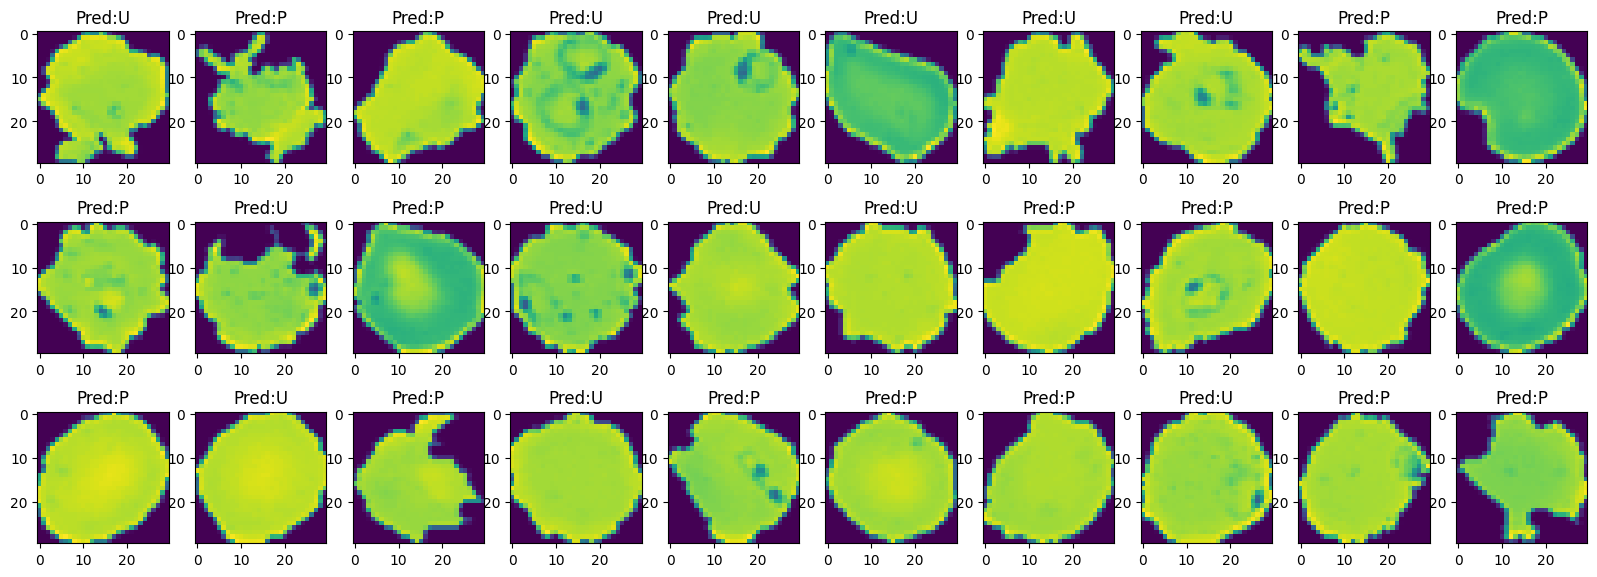

In [20]:
plt.figure(figsize=(20,7))
for i in range(len(test_imgs)):
    plt.subplot(3,10,i + 1)
    plt.imshow(test_imgs[i])
    plt.title(['Pred:U','Pred:P'][np.argmax(preds[i])])

In [ ]:
model1 = Sequential()
model1.add(Flatten(input_shape = (img_size_x, img_size_y, 1)))
model1.add(Dense(n_hidden_1, activation = 'ReLU'))
model1.add(Dense(n_hidden_2, activation = 'ReLU'))
model1.add(Dense(n_hidden_3, activation = 'ReLU'))
model1.add(Dense(n_classes, activation = 'ReLU'))

optimizer1 = tf.keras.optimizers.Adamax(learning_rate=0.0001)
model1.compile(loss='MSE', optimizer=optimizer1, metrics = ['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=1, epochs=10, validation_split=0.2, verbose = 1)

Epoch 1/10
320/320 [==============================] - 7s 19ms/step - loss: 0.3773 - accuracy: 0.5063 - val_loss: 0.3977 - val_accuracy: 0.4625
Epoch 2/10
320/320 [==============================] - 6s 18ms/step - loss: 0.3365 - accuracy: 0.5500 - val_loss: 0.2703 - val_accuracy: 0.4750
Epoch 3/10
320/320 [==============================] - 6s 20ms/step - loss: 0.2612 - accuracy: 0.5312 - val_loss: 0.2680 - val_accuracy: 0.4750
Epoch 4/10
320/320 [==============================] - 6s 20ms/step - loss: 0.2504 - accuracy: 0.5906 - val_loss: 0.2525 - val_accuracy: 0.5250
Epoch 5/10
320/320 [==============================] - 7s 21ms/step - loss: 0.2348 - accuracy: 0.6219 - val_loss: 0.2958 - val_accuracy: 0.5375
Epoch 6/10
320/320 [==============================] - 7s 21ms/step - loss: 0.2408 - accuracy: 0.5813 - val_loss: 0.2475 - val_accuracy: 0.5125
Epoch 7/10
  7/320 [..............................] - ETA: 6s - loss: 0.2049 - accuracy: 0.7143

In [ ]:
model1.evaluate(x_test, y_test)

In [ ]:
plt.title('Learning curves')
plt.plot(history1.history['loss'], label = 'loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
plt.title('Learning curves')
plt.plot(history1.history['accuracy'], label = 'acc')
plt.xlabel('epochs')
plt.legend()
plt.show()